<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/Scrape_TripAdvisor_Hotels_Data_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Scrape and extract TripAdvisor hotels data and create a data set.

In [ ]:
# Import the libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv


*   requests allows you to send HTTP requests to a server which returns a Response Object with all the response data (i.e. HTML).

*   beautifulsoup (bs4) is used to pull data out of HTML files and convert the data to a BeautifulSoup object, which represents the HTML as a nested data structure.
*   pandas is used for data analysis and manipulation.
*   csv module implements classes to read and write tabular data in CSV format.


**Review the Web Page's HTML Structure**

We need to understand the structure and contents of the HTML tags within the web pages. For this project, we will be using the TripAdviser Hawaii Hotels and Places to Stay webpage (shown below). You can find this webpage by selecting this link https://www.tripadvisor.in/Hotels-g28932-Hawaii-Hotels.html

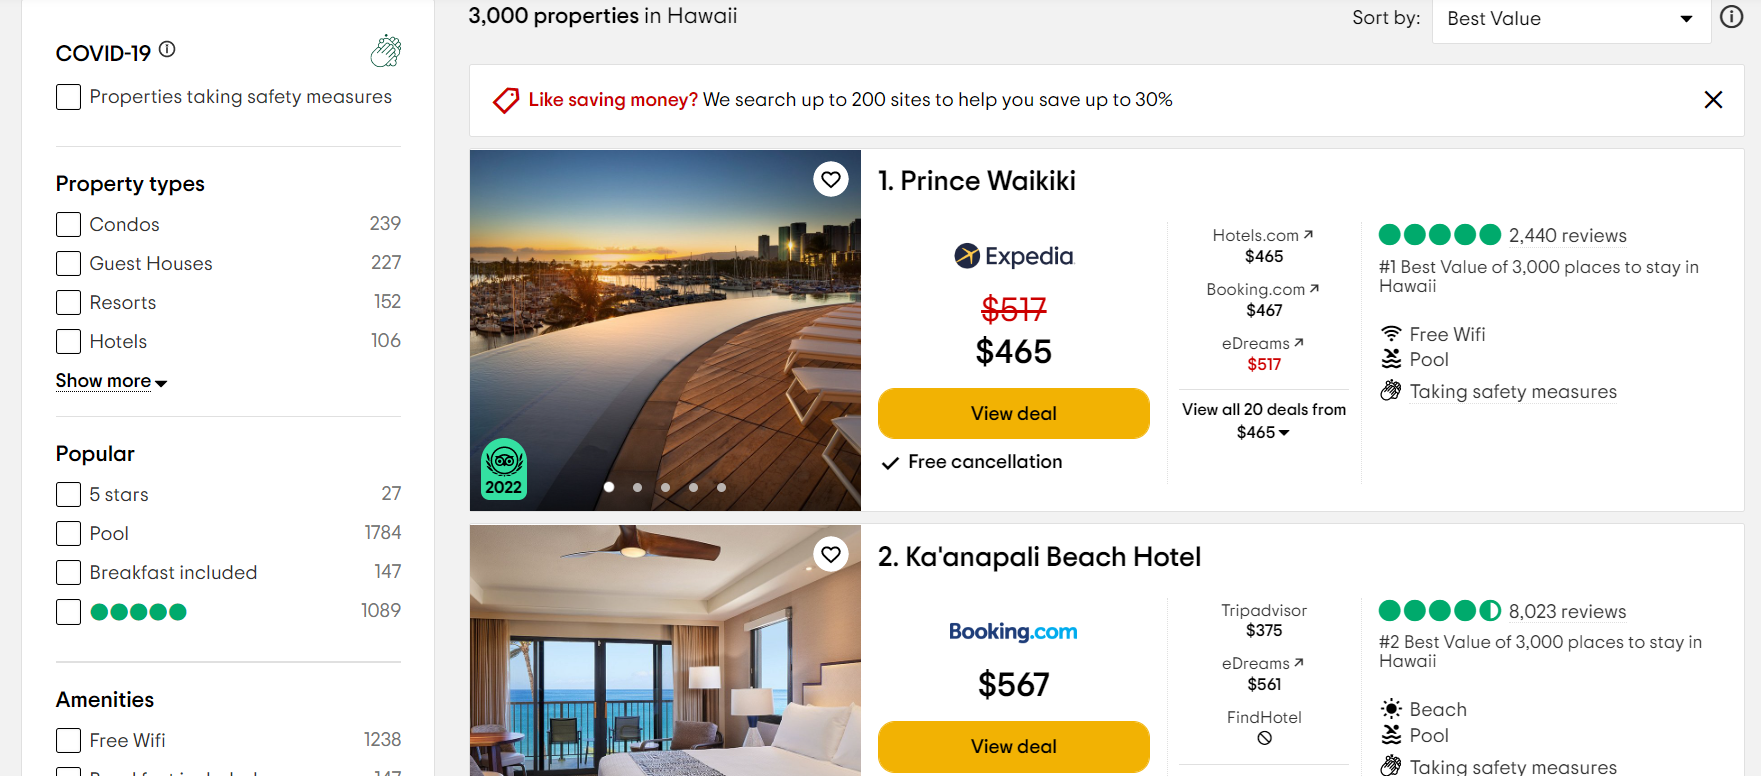


We can scrape this webpage by parsing the HTML of the page and extracting the information needed for our dataset. To scrape some data from this web page right click anywhere on the web page, click the arrow icon on the upper left-hand side of the screen with the HTML and then click the hotel name (Prince Waikiki) in the review section of the webpage. This will result in the following screen being displayed.

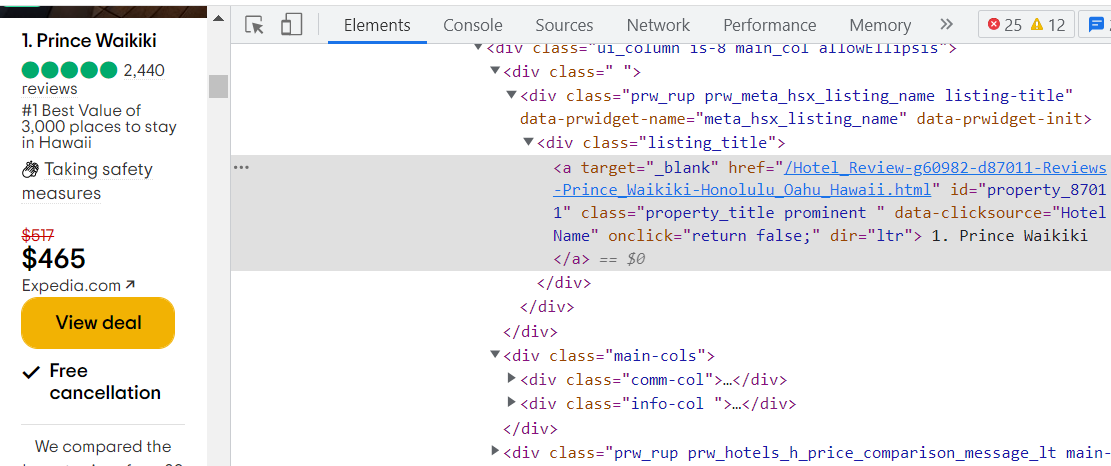



On the HTML screen, you will see highlighted the HTML line containing the Hotel Name - Prince Waikiki.

If you move up one line from this tag you will find the div tag with a class of "listing_title". This is the parent of the <a tag.

So, if you wanted to find, extract and capture all the hotel names on the web page you would do the following steps.
1. Find all the HTML lines for a specific parent (div tag with class = listing_title) which would include their associated children.

2. Extract the data elements and build a list containing each of the hotel names. 

The code for finding and extracting hotel names would be the following:


In [ ]:
hotels = []
for name in soup.findAll('div',{'class':'listing_title'}):
    hotels.append(name.text.strip())
hotel

We will find, extract and store the other data elements on the web page following a similar procedure as described above.

**Retrieve and Convert the HTML**

Create an object (URL) containing the website address and send a get request for the specific URL's HTML to the web server. Then retrieve the HTML data that the web server sends back and convert the data into a BeautifulSoup object.

In [ ]:
# Extract the HTML and create a BeautifulSoup object.
url = ('https://www.tripadvisor.in/Hotels-g28932-Hawaii-Hotels.html')

user_agent = ({'User-Agent':
			'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
			AppleWebKit/537.36 (KHTML, like Gecko) \
			Chrome/90.0.4430.212 Safari/537.36',
			'Accept-Language': 'en-US, en;q=0.5'})

def get_page_contents(url):
    page = requests.get(url, headers = user_agent)
    return BeautifulSoup(page.text, 'html.parser')

soup = get_page_contents(url)

The HTML content of the webpages will be parsed and scraped using Beautiful Soup. Beautiful Soup is a great tool for parsing and scraping websites because of the numerous functions it provides to extract data from HTML. To learn more about BeautifulSoup select this link (https://www.crummy.com/software/BeautifulSoup/bs4/doc/#specifying-the-parser-to-usehttps://) 

For this project we will be using the TripAdviser Hawaii Hotels and Places to Stay webpage. You can find this webpage by selecting this link https://www.tripadvisor.in/Hotels-g28932-Hawaii-Hotels.html 


After reviewing the TripAdviser Hawaii Hotels and Places to Stay webpage, I have decided to extract the following data elements from the hotels: 

*   Hotel Names 
*   Ratings
*   Number of Reviews
*   Prices 

**Find and Extract the Data Elements**

For each of the data elements we want to extract, we will find all the HTML lines that are within a specific tag and class. We will then extract the data elements and store the data in a list. 

In [ ]:
hotels = []
for name in soup.findAll('div',{'class':'listing_title'}):
    hotels.append(name.text.strip())

In [ ]:
ratings = []
for rating in soup.findAll('a',{'class':'ui_bubble_rating'}):
    ratings.append(rating['alt'])  

In [ ]:
reviews = []
for review in soup.findAll('a',{'class':'review_count'}):
    reviews.append(review.text.strip())

In [18]:
prices = []
for p in soup.findAll('div',{'class':'price-wrap'}):
    prices.append(p.text.replace('₹','').strip())   

**Create the Data Frame**

We will create a dictionary that will contain the data names and values for all the data elements that were extracted.

In [19]:
dict = {'Hotel Names':hotels,'Ratings':ratings,'Number of Reviews':reviews,'Prices':prices}

Create and display the data frame.

In [20]:
hawaii = pd.DataFrame.from_dict(dict)
hawaii.head(10)

,Hotel Names,Ratings,Number of Reviews,Prices
0,1. Prince Waikiki,5 of 5 bubbles,"2,440 reviews",$530
1,2. Ka'anapali Beach Hotel,4.5 of 5 bubbles,"8,023 reviews",$648
2,3. Hotel La Croix Waikiki,4.5 of 5 bubbles,"1,432 reviews",$273
3,4. Hyatt Regency Maui Resort and Spa,4 of 5 bubbles,"9,679 reviews","$1,059"
4,5. Queen Kapiolani Hotel,4.5 of 5 bubbles,"1,418 reviews",$323
5,6. Royal Kona Resort,4 of 5 bubbles,"4,446 reviews",$318
6,7. Sheraton Waikiki,4 of 5 bubbles,"7,554 reviews",$502
7,8. Hyatt Regency Waikiki Beach Resort And Spa,4 of 5 bubbles,"8,025 reviews",$506$400
8,9. Halekulani Hotel,4.5 of 5 bubbles,"3,111 reviews",$802
9,10. Waikiki Beachcomber by Outrigger,4.5 of 5 bubbles,434 reviews,$347


**Convert the Data Frame to a CSV file**

In [ ]:
# Convert dataframe to CSV file.
hawaii.to_csv('hotels.csv', index=False, header=True)

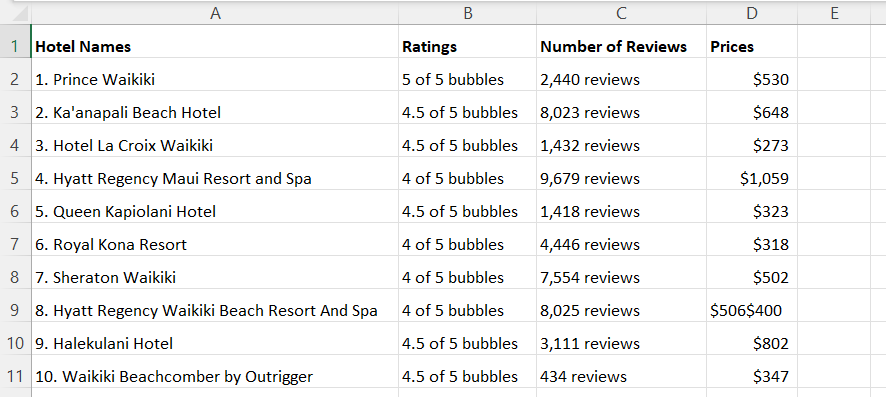

Putting it all together...

In [ ]:
# Import the libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv

# Extract the HTML and create a BeautifulSoup object.
url = ('https://www.tripadvisor.in/Hotels-g28932-Hawaii-Hotels.html')

user_agent = ({'User-Agent':
			'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
			AppleWebKit/537.36 (KHTML, like Gecko) \
			Chrome/90.0.4430.212 Safari/537.36',
			'Accept-Language': 'en-US, en;q=0.5'})

def get_page_contents(url):
    page = requests.get(url, headers = user_agent)
    return BeautifulSoup(page.text, 'html.parser')

soup = get_page_contents(url)

# Find and extract the data elements.
hotels = []
for name in soup.findAll('div',{'class':'listing_title'}):
    hotels.append(name.text.strip())

ratings = []
for rating in soup.findAll('a',{'class':'ui_bubble_rating'}):
    ratings.append(rating['alt'])  

reviews = []
for review in soup.findAll('a',{'class':'review_count'}):
    reviews.append(review.text.strip())

prices = []
for p in soup.findAll('div',{'class':'price-wrap'}):
    prices.append(p.text.replace('₹','').strip())  

# Create the dictionary.
dict = {'Hotel Names':hotels,'Ratings':ratings,'Number of Reviews':reviews,'Prices':prices}

# Create the dataframe.
hawaii = pd.DataFrame.from_dict(dict)
hawaii.head(10)

# Convert dataframe to CSV file.
hawaii.to_csv('hotels.csv', index=False, header=True)
